In [1]:
import pandas as pd
import numpy as np
import os
# acquire
from env import host, user, password
from pydataset import data

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

import acquire

# Acquire

In [2]:
#acquire for zillow
zillow_df= acquire.new_zillow_data()

In [3]:
#Looking at first 5 values
zillow_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,unitcnt,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
0,3.0,2.0,1316.0,1.0,205123.0,1923.0,2627.48,6037.0,11721753
1,3.0,2.0,1458.0,1.0,136104.0,1970.0,2319.90,6037.0,11289917
2,2.0,1.0,1421.0,1.0,35606.0,1911.0,543.69,6037.0,11705026
3,4.0,3.0,2541.0,NaN,880456.0,2003.0,9819.72,6059.0,14269464
4,3.0,2.0,1491.0,1.0,107110.0,1955.0,1399.27,6037.0,11446756


In [4]:
#28,000 rows and 8 columns
zillow_df.shape

(28418, 9)

In [5]:
# Displaying readable summary statistics for numeric columns.
zillow_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,28418.0,3.298086e+00,9.547586e-01,0.00,3.00,3.0,4.00,1.200000e+01
bathroomcnt,28418.0,2.311070e+00,1.017817e+00,0.00,2.00,2.0,3.00,1.100000e+01
calculatedfinishedsquarefeet,28345.0,1.931781e+03,1.013657e+03,240.00,1276.00,1669.0,2319.00,3.564000e+04
unitcnt,17908.0,1.001731e+00,5.539339e-02,1.00,1.00,1.0,1.00,4.000000e+00
taxvaluedollarcnt,28417.0,5.332912e+05,7.063144e+05,1000.00,198412.00,380733.0,630000.00,2.385837e+07
yearbuilt,28322.0,1.963908e+03,2.307474e+01,1878.00,1950.00,1961.0,1980.00,2.016000e+03
taxamount,28417.0,6.486383e+03,8.209046e+03,51.26,2690.92,4703.7,7495.44,2.767978e+05
fips,28418.0,6.050004e+03,2.191571e+01,6037.00,6037.00,6037.0,6059.00,6.111000e+03
parcelid,28418.0,1.307361e+07,3.747577e+06,10711855.00,11523237.25,12611531.0,14163710.25,1.676878e+08


In [6]:
# Running .info() shows us that the exam3 column is not a numeric data type; it's an object.

zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28418 entries, 0 to 28417
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    28418 non-null  float64
 1   bathroomcnt                   28418 non-null  float64
 2   calculatedfinishedsquarefeet  28345 non-null  float64
 3   unitcnt                       17908 non-null  float64
 4   taxvaluedollarcnt             28417 non-null  float64
 5   yearbuilt                     28322 non-null  float64
 6   taxamount                     28417 non-null  float64
 7   fips                          28418 non-null  float64
 8   parcelid                      28418 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 2.0 MB


In [7]:
#Looking at how many nulls in each column
zillow_df.isnull().sum()

bedroomcnt                          0
bathroomcnt                         0
calculatedfinishedsquarefeet       73
unitcnt                         10510
taxvaluedollarcnt                   1
yearbuilt                          96
taxamount                           1
fips                                0
parcelid                            0
dtype: int64

In [8]:
# Count duplicate on a bedroom count column
zillow_df.bedroomcnt.duplicated().sum()

28405

In [9]:
# Count duplicate on a bathroom count column
zillow_df.bathroomcnt.duplicated().sum()

28398

In [10]:
# Count duplicate on a calculatedfinishedsquarefeet column
zillow_df.calculatedfinishedsquarefeet.duplicated().sum()

24360

In [11]:
# Count duplicate on a unitcnt column
zillow_df.unitcnt.duplicated().sum()

28414

In [12]:
# Count duplicate on a taxvaluedollarcnt column
zillow_df.taxvaluedollarcnt.duplicated().sum()

5484

In [13]:
#created a for loop that goes through each column and counts the duplicates
for cols in zillow_df: 
    count= zillow_df[cols].duplicated().sum()
    print(f''' 
    {cols} count: {count}''')
    

 
    bedroomcnt count: 28405
 
    bathroomcnt count: 28398
 
    calculatedfinishedsquarefeet count: 24360
 
    unitcnt count: 28414
 
    taxvaluedollarcnt count: 5484
 
    yearbuilt count: 28286
 
    taxamount count: 479
 
    fips count: 28415
 
    parcelid count: 26


In [14]:
#33 rows have duplicates as shown here with a mask
zillow_df[zillow_df.duplicated()== True]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,unitcnt,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
325,2.0,1.0,1082.0,1.0,314100.0,1921.0,3731.14,6037.0,12102046
417,3.0,2.0,1780.0,1.0,347615.0,1977.0,4538.95,6037.0,12847318
526,4.0,2.5,2217.0,NaN,98707.0,1972.0,1343.64,6059.0,14050918
881,2.0,1.0,1166.0,1.0,324880.0,1911.0,4042.46,6037.0,11717962
1069,4.0,3.5,3453.0,NaN,939019.0,2006.0,14702.96,6059.0,14455319
1446,2.0,1.0,1025.0,NaN,48107.0,1940.0,862.90,6059.0,14074415
1670,4.0,3.0,2717.0,NaN,733000.0,1998.0,8314.78,6111.0,17225336
1964,4.0,4.0,2459.0,NaN,479000.0,2007.0,12285.88,6111.0,162960529
3220,2.0,1.0,1228.0,1.0,486805.0,1918.0,5892.10,6037.0,12537644
3825,3.0,3.5,4373.0,NaN,5279300.0,1988.0,55756.66,6059.0,13893511


In [15]:
# looking at duplicates by unique values
zillow_df.duplicated().value_counts()

False    28392
True        26
dtype: int64

## Acquire Takeways:
- need to drop nulls from calculatedfinishedsquarefeet, unitcnt, taxvaluedollarcnt, yearbuilt, taxamount 
- need to drop duplicates by parcelid (this is a unique identifier)
- all datatypes look good, no changes needed

# Prepare

In [28]:
# Count duplicate on a bedroom count column
zillow_df['parcelid'].duplicated().sum()

0

In [29]:
#drop duplicated by unique identifier parcelid column
zillow_df.drop_duplicates(subset=['parcelid'], inplace= True)

In [30]:
#Looking at shape after dropping columns
zillow_df.shape

(17889, 10)

In [31]:
# Drop all rows with any Null values, assign to df, and verify.
zillow_df = zillow_df.dropna()


In [32]:
# create Tax_rate column
zillow_df['tax_rate'] =zillow_df['taxamount']/ zillow_df['taxvaluedollarcnt']

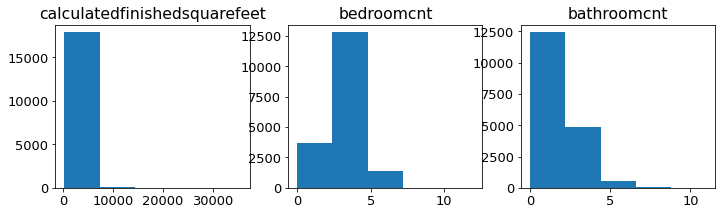

In [33]:
#Looking to see outliers were removed, can see all columns are closer to a normal distribution

# Plot the distributions
plt.figure(figsize=(16, 3))

# List of columns
cols = ['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow_df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

## Drop outliers

In [34]:
#Function to see outliers
def outlier_bound_calculation(df, variable):
    '''
    calcualtes the lower and upper bound to locate outliers in variables
    '''
    quartile1, quartile3 = np.percentile(df[variable], [25,75])
    IQR_value = quartile3 - quartile1
    lower_bound = quartile1 - (1.5 * IQR_value)
    upper_bound = quartile3 + (1.5 * IQR_value)
    '''
    returns the lowerbound and upperbound values
    '''
    return print(f'For {variable} the lower bound is {lower_bound} and  upper bound is {upper_bound}')

In [35]:
outlier_bound_calculation(zillow_df, 'calculatedfinishedsquarefeet')

For calculatedfinishedsquarefeet the lower bound is -189.5 and  upper bound is 3550.5


In [41]:
#remove outliers from calculatedfinishedsquarefeet
zillow_df= zillow_df[zillow_df.calculatedfinishedsquarefeet > -189.5]
zillow_df= zillow_df[zillow_df.calculatedfinishedsquarefeet < 3550.5]

In [54]:
#making sure it did what it is suppose to
zillow_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,16466.0,3.132637e+00,7.860892e-01,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
bathroomcnt,16466.0,2.055144e+00,7.844499e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
calculatedfinishedsquarefeet,16466.0,1.661716e+03,6.151294e+02,3.260000e+02,1.203000e+03,1.531000e+03,2.010000e+03,3.546000e+03
unitcnt,16466.0,1.000668e+00,2.583868e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
taxvaluedollarcnt,16466.0,4.140726e+05,4.396219e+05,1.000000e+03,1.599828e+05,3.126130e+05,5.163295e+05,1.087391e+07
yearbuilt,16466.0,1.956520e+03,2.192279e+01,1.878000e+03,1.947000e+03,1.954000e+03,1.966000e+03,2.016000e+03
taxamount,16466.0,5.292535e+03,5.140047e+03,1.208400e+02,2.337832e+03,4.160790e+03,6.482358e+03,1.293654e+05
fips,16466.0,6.037006e+03,6.016195e-01,6.037000e+03,6.037000e+03,6.037000e+03,6.037000e+03,6.111000e+03
parcelid,16466.0,1.189747e+07,2.224930e+06,1.071186e+07,1.119908e+07,1.189017e+07,1.249948e+07,1.676380e+08
tax_rate,16466.0,1.415182e-02,8.867406e-03,8.574462e-04,1.215152e-02,1.269762e-02,1.447394e-02,8.164900e-01


In [46]:
outlier_bound_calculation(zillow_df, 'bedroomcnt')

For bedroomcnt the lower bound is 1.5 and  upper bound is 5.5


In [47]:
#remove outliers from bedroomcnt
zillow_df= zillow_df[zillow_df.bedroomcnt >1.5]
zillow_df= zillow_df[zillow_df.bedroomcnt < 5.5]

In [37]:
outlier_bound_calculation(zillow_df, 'bathroomcnt')

For bathroomcnt the lower bound is 0.5 and  upper bound is 4.5


In [48]:
#remove outliers from bedroomcnt
zillow_df= zillow_df[zillow_df.bathroomcnt > 0.5]
zillow_df= zillow_df[zillow_df.bathroomcnt < 4.5]

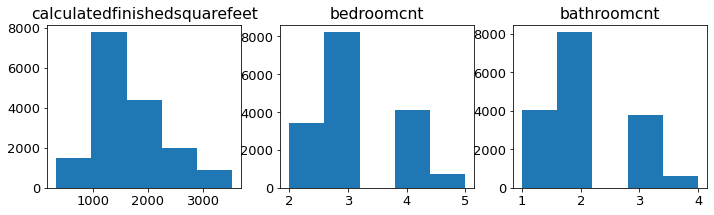

In [49]:
# Visualize to make sure outliers were removed, all graphs are closer to normal distribution
# Plot the distributions
plt.figure(figsize=(16, 3))

# List of columns
cols = ['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow_df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

In [50]:
zillow_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,unitcnt,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid,tax_rate
0,3.0,2.0,1316.0,1.0,205123.0,1923.0,2627.48,6037.0,11721753,0.012809
1,3.0,2.0,1458.0,1.0,136104.0,1970.0,2319.90,6037.0,11289917,0.017045
2,2.0,1.0,1421.0,1.0,35606.0,1911.0,543.69,6037.0,11705026,0.015270
4,3.0,2.0,1491.0,1.0,107110.0,1955.0,1399.27,6037.0,11446756,0.013064
5,3.0,2.0,1650.0,1.0,614000.0,1949.0,7673.19,6037.0,11389003,0.012497


## Hypothesis 1:
- HO: Square feet has no affect on tax value dollar count
- Ha: Square feet has an affect on tax value dollar count

## Hypothesis 2:
- HO: bedroom count has no affect on tax value dollar count
- Ha: bedroom count has an affect on tax value dollar count

## Hypothesis 3:
- HO: bathroom count has no affect on tax value dollar count
- Ha: bathroom count has an affect on tax value dollar count